In [15]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing()

In [16]:
x = sp.Function('x')
w0 = sp.Symbol('omega_0', real = True, positive = True)
t = sp.Symbol('t')
x0 = sp.Symbol('x_0', real = True)
v0 = sp.Symbol('v_0', real = True)
gamma = sp.Symbol('gamma', real = True, positive = True)
F = sp.Symbol('F', real = True)
omega = sp.Symbol('Omega', real = True)
x(t), w0, t, x0, v0, gamma, F, omega

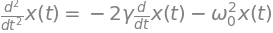

In [17]:
eq_tlumienie = sp.Eq(x(t).diff(t, t), -w0**2 * x(t)-2*gamma*x(t).diff(t))
eq_tlumienie

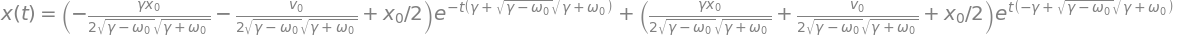

In [4]:
sol_t = sp.dsolve(eq_tlumienie, x(t), ics = {x(0): x0, x(t).diff(t).subs(t, 0): v0})
sol_t

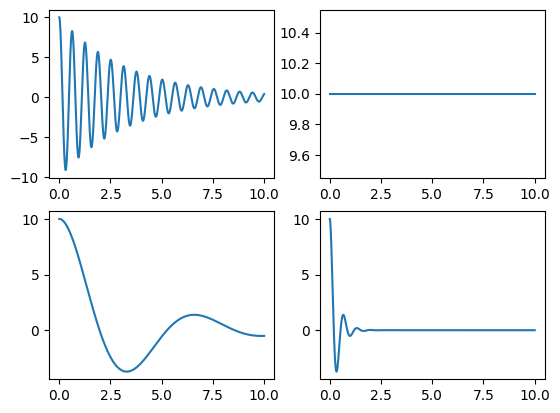

In [6]:
#rozwiazanie z tlumieniem
solf1 = sp.lambdify(t, sol_t.rhs.subs({x0: 10, v0: 0, w0: 10, gamma:0.3}))
solf2 = sp.lambdify(t, sol_t.rhs.subs({x0: 10, v0: 0, w0: 1, gamma:0.3}))
solf3 = sp.lambdify(t, sol_t.rhs.subs({x0: 10, v0: 0, w0: 0, gamma:0.3}))
solf4 = sp.lambdify(t, sol_t.rhs.subs({x0: 10, v0: 0, w0: 10, gamma:3}))

ts = np.linspace(0, 10, 1000)
fig, ax = plt.subplots(2, 2)

ax[0, 0].plot(ts, solf1(ts))
ax[1, 0].plot(ts, solf2(ts))
ax[0, 1].plot(ts, solf3(ts))
ax[1, 1].plot(ts, solf4(ts))
# plt.plot(ts, solf(ts))


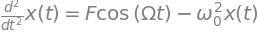

In [8]:
eq_wymuszenie = sp.Eq(x(t).diff(t, t), -w0**2 * x(t)+F*sp.cos(omega*t))
eq_wymuszenie

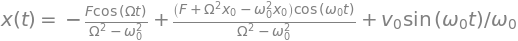

In [9]:
sol_w = sp.dsolve(eq_wymuszenie, x(t), ics = {x(0): x0, x(t).diff(t).subs(t, 0): v0})
sol_w

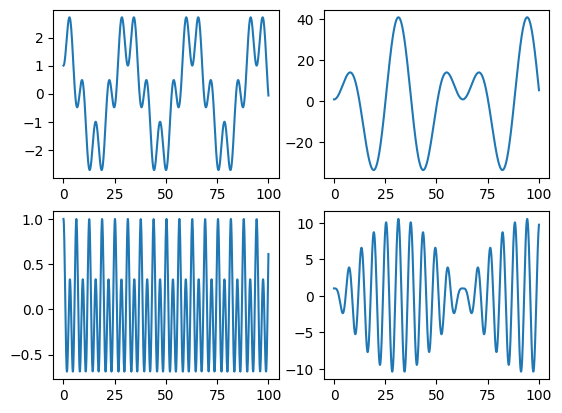

In [10]:
#rozwiazanie z wymuszeniem
solf1 = sp.lambdify(t, sol_w.rhs.subs({x0: 1, v0: 0, w0: 0.2, F:1, omega:1}))
solf2 = sp.lambdify(t, sol_w.rhs.subs({x0: 1, v0: 0, w0: 2, F:1, omega:1}))
solf3 = sp.lambdify(t, sol_w.rhs.subs({x0: 1, v0: 0, w0: 0.2, F:1, omega:0.3}))

solf4 = sp.lambdify(t, sol_w.rhs.subs({x0: 1, v0: 0, w0: 1, F:1, omega:1.1}))

ts = np.linspace(0, 100, 1000)
fig, ax = plt.subplots(2, 2)

ax[0, 0].plot(ts, solf1(ts))
ax[1, 0].plot(ts, solf2(ts))
ax[0, 1].plot(ts, solf3(ts))
ax[1, 1].plot(ts, solf4(ts))

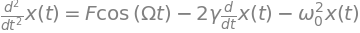

In [11]:
eq = sp.Eq(x(t).diff(t, t), -w0**2 * x(t)+F*sp.cos(omega*t)-2*gamma*x(t).diff(t))
eq

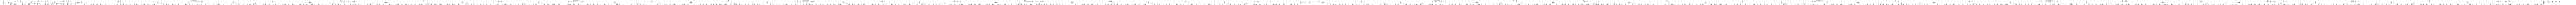

In [12]:
sol = sp.dsolve(eq, x(t), ics = {x(0): x0, x(t).diff(t).subs(t, 0): v0})
sol

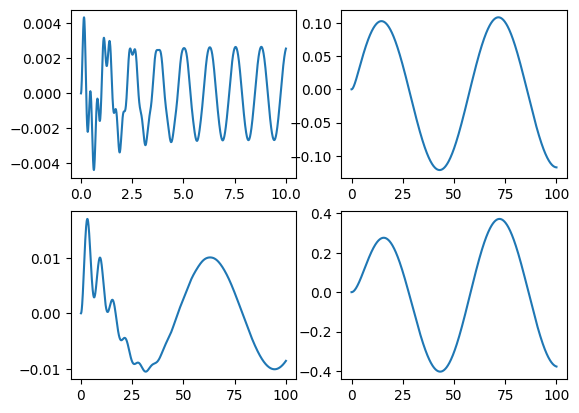

In [14]:
#rozwiazanie z tlumieniem + wymuszeniem
solf1 = sp.lambdify(t, sol.rhs.subs({x0: 0, v0: 0, w0: 20, gamma:0.7, F:1, omega:5}))
solf2 = sp.lambdify(t, sol.rhs.subs({x0: 0, v0: 0, w0: 10, gamma:1, F:1, omega:1}))
solf3 = sp.lambdify(t, sol.rhs.subs({x0: 0, v0: 0, w0: 1, gamma:4, F:1, omega:1.1}))
solf4 = sp.lambdify(t, sol.rhs.subs({x0: 0, v0: 0, w0: 1, gamma:1.2, F:1, omega:1.1}))

ts = np.linspace(0, 10, 1000)
ts1 = np.linspace(0, 100, 1000)

fig, ax = plt.subplots(2, 2)

ax[0, 0].plot(ts, solf1(ts))
ax[1, 0].plot(ts1, solf2(ts))
ax[0, 1].plot(ts1, solf3(ts))
ax[1, 1].plot(ts1, solf4(ts))